In [1]:
import acquire
import warnings
warnings.filterwarnings("ignore")
import prepare
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split

Reading from csv...
Reading from csv...
Reading from csv...


**Exercises**
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db:** Using iris data from our mySQL server and the methods used in the lesson above:



**1. Acquire, prepare & split your data.**



In [2]:
iris = prepare.prep_iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [3]:
train, test = train_test_split(iris, train_size=0.8, random_state=42, stratify=iris.species)
train, validate = train_test_split(train, train_size=0.7, random_state=42, stratify=train.species)
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

**2. Univariate Stats**



1. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 131 to 65
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


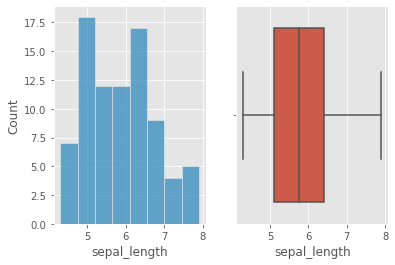

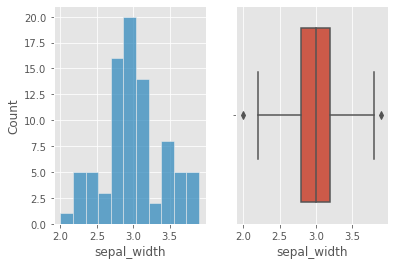

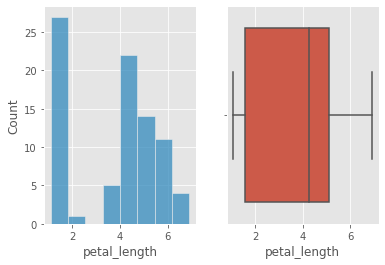

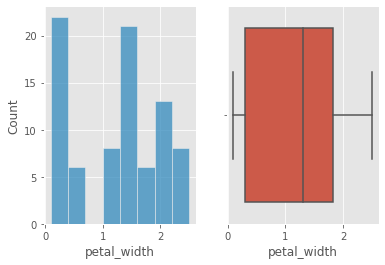

In [5]:
univariate_cols = train.select_dtypes('float64').columns.tolist()
for col in univariate_cols:
    plt.subplot(1,2,1)
    sns.histplot(train[col])
    plt.subplot(1,2,2)
    sns.boxplot(train[col])
    plt.show()

2. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [6]:
train.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

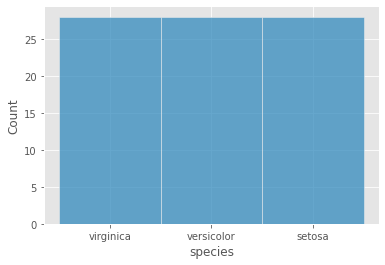

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

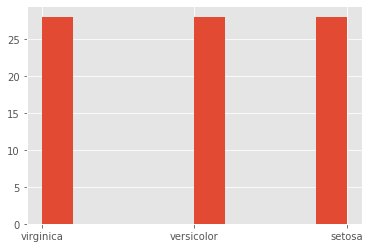

In [7]:
sns.histplot(train.species)
plt.show()
plt.hist(train.species)

3. Document takeaways & any actions.



In [8]:
#there is a uniform distribution of species in the data set

**3. Bivariate Stats**



1. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



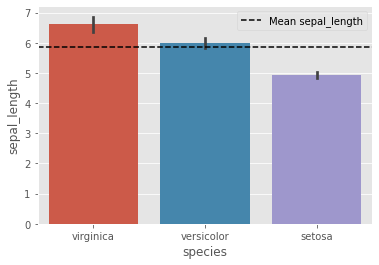

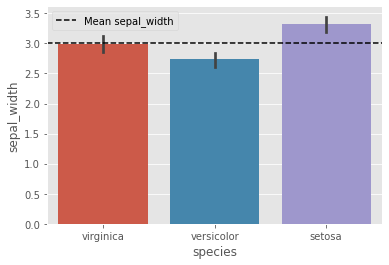

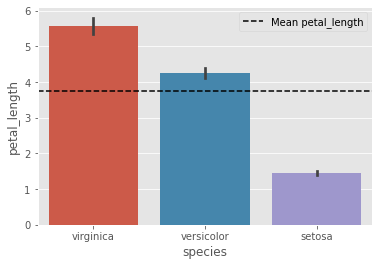

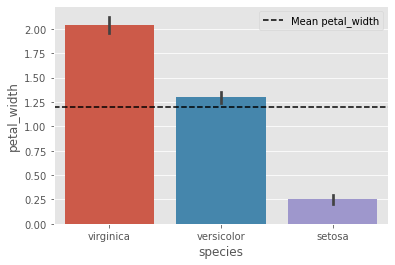

In [9]:
for col in univariate_cols:
    sns.barplot(x=train.species, y= train[col])
    plt.axhline(train[col].mean(), label=f'Mean {col}', color='black', linestyle='--')
    plt.legend()
    plt.show()

2. For each measurement type, compute the descriptive statistics for each species.



In [10]:
list_species = train.species.unique().tolist()
list_species

['virginica', 'versicolor', 'setosa']

In [11]:
for species in list_species:    
    describe_df = pd.DataFrame()
    for col in univariate_cols:
        df=pd.DataFrame(train[train.species== species][col].describe())
        describe_df = pd.concat([describe_df,df],axis=1)
    print(species.upper())
    print(describe_df)
    print("")

VIRGINICA
       sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000    28.000000
mean       6.610714     2.982143      5.571429     2.042857
std        0.734514     0.363169      0.609102     0.239488
min        4.900000     2.500000      4.500000     1.500000
25%        6.275000     2.775000      5.100000     1.875000
50%        6.600000     3.000000      5.550000     2.050000
75%        7.125000     3.200000      5.925000     2.225000
max        7.900000     3.800000      6.900000     2.500000

VERSICOLOR
       sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000    28.000000
mean       5.989286     2.732143      4.253571     1.296429
std        0.484072     0.303136      0.380528     0.155116
min        5.000000     2.000000      3.500000     1.000000
25%        5.675000     2.600000      4.000000     1.200000
50%        5.900000     2.800000      4.250000     1.300000
75%        6.30000

3. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



In [12]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

for col in univariate_cols:    
    t, p = stats.mannwhitneyu(virginica[col], versicolor[col])
    print(f'Mann-Whitney test for {col} between virginica and versicolor\n t: {t}, p: {p:.4f}\n')

Mann-Whitney test for sepal_length between virginica and versicolor
 t: 603.5, p: 0.0005

Mann-Whitney test for sepal_width between virginica and versicolor
 t: 527.0, p: 0.0264

Mann-Whitney test for petal_length between virginica and versicolor
 t: 773.5, p: 0.0000

Mann-Whitney test for petal_width between virginica and versicolor
 t: 781.5, p: 0.0000



4. Document takeaways & any actions.



Not at this time. however I think a scatterplot of petal measurements would work better if goal is to view correlation for species

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

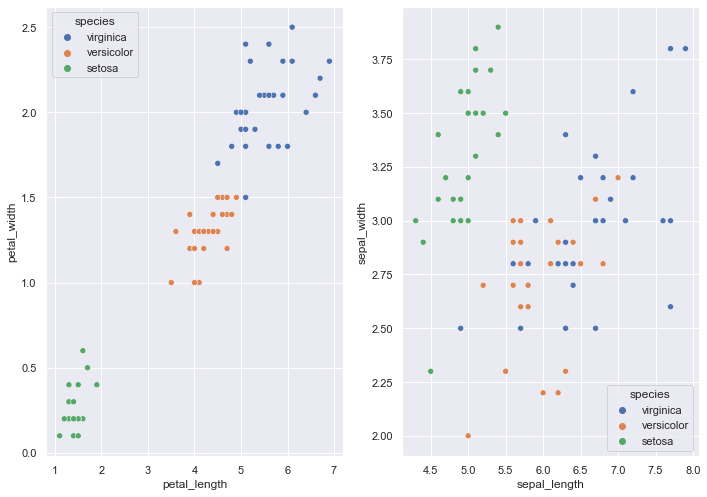

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1,2,1)
sns.scatterplot(x=train.petal_length, y= train.petal_width, hue = train.species)
plt.subplot(1,2,2)
sns.scatterplot(x=train.sepal_length, y= train.sepal_width, hue = train.species)

**4. Multivariate Stats**



1. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



In [26]:
#add area measures to train and to subsets of that dataset
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
virginica = train[train.species == 'virginica'].drop(columns=['species_versicolor','species_virginica'])
versicolor = train[train.species == 'versicolor'].drop(columns=['species_versicolor','species_virginica'])
setosa = train[train.species == 'setosa'].drop(columns=['species_versicolor','species_virginica'])

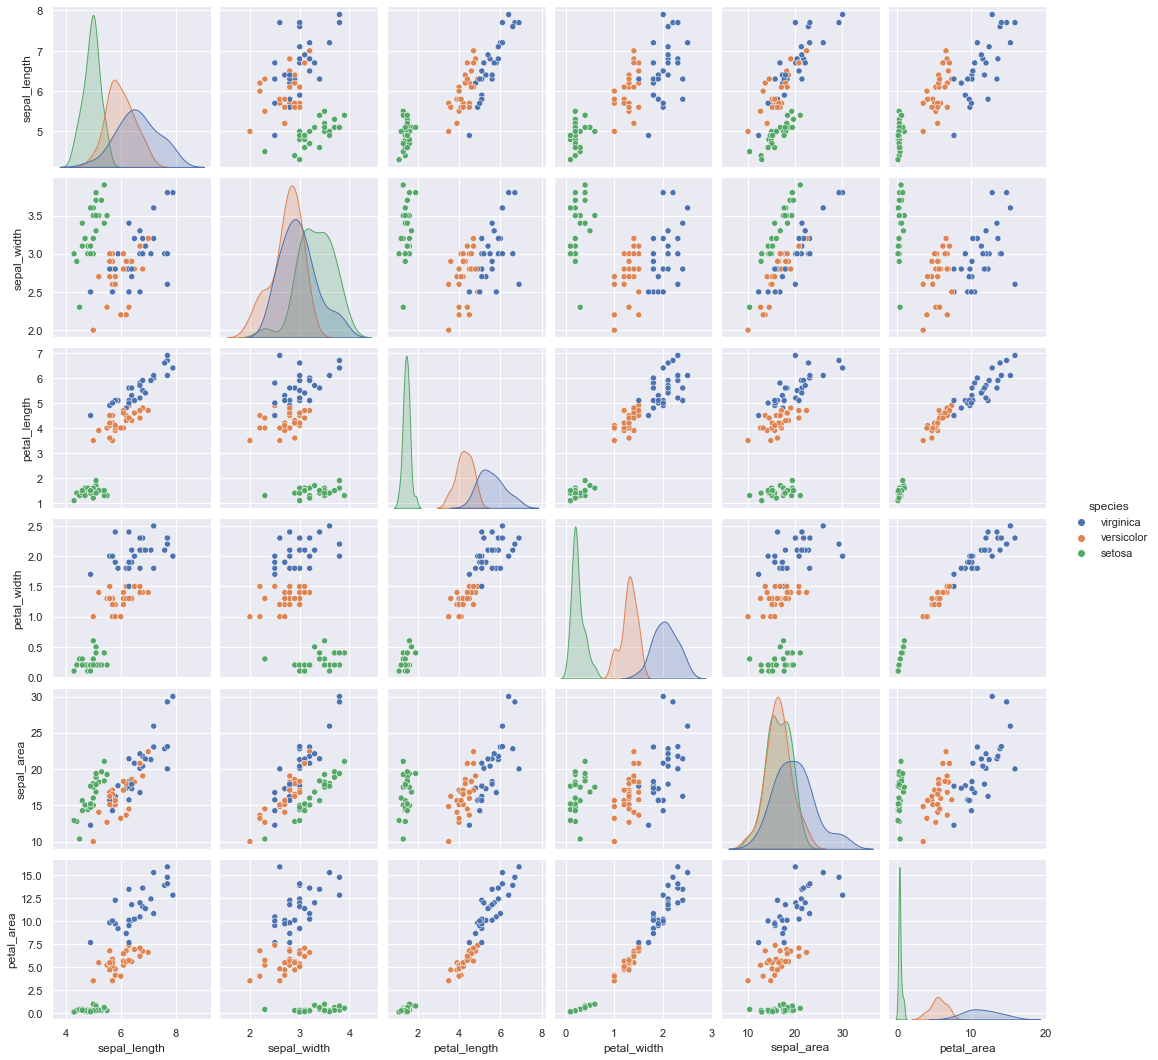

In [15]:
sns.pairplot(train.drop(columns=['species_versicolor','species_virginica']), hue='species')


2. Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col



In [16]:
means = train.groupby('species').mean()

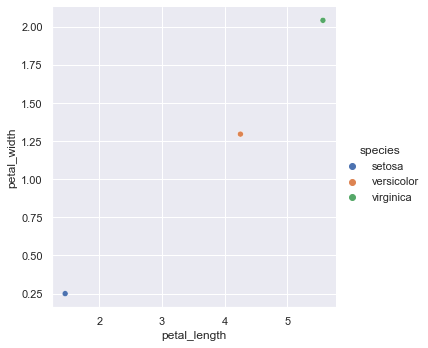

In [17]:
sns.relplot(means.petal_length,means.petal_width, hue= means.index)

3. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



In [18]:
iris_melt = train.drop(columns=['species_versicolor','species_virginica'])
iris_melt = iris_melt.melt(id_vars=['species'],var_name='measurement', value_name=  'measure')
iris_melt.head()

,species,measurement,measure
0,virginica,sepal_length,7.9
1,versicolor,sepal_length,5.2
2,virginica,sepal_length,6.7
3,versicolor,sepal_length,5.8
4,setosa,sepal_length,5.0


<AxesSubplot:xlabel='measurement', ylabel='measure'>

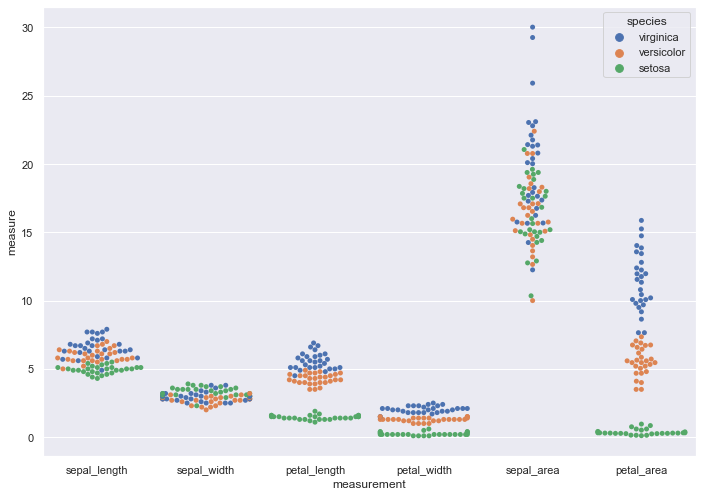

In [19]:
sns.swarmplot(data=iris_melt, x = 'measurement', y ='measure', hue='species')

4. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



In [20]:
# sepal area is not as useful as petal area as viewed in the above swarmplot.
t, p = stats.mannwhitneyu(virginica['sepal_area'], setosa['sepal_area'])
t, p

(592.0, 0.0010777670619209008)

In [21]:
# vastly different t, and p values as noted in the two mann-whitney tests
t, p = stats.mannwhitneyu(virginica['petal_area'], setosa['petal_area'])
t, p

(784.0, 1.3691356662537837e-10)

In [22]:
versicolor.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,0.388605,0.721039,0.468063,0.775781,0.633009
sepal_width,0.388605,1.000000,0.363393,0.404242,0.879308,0.402904
petal_length,0.721039,0.363393,1.000000,0.687306,0.603290,0.892679
petal_width,0.468063,0.404242,0.687306,1.000000,0.502484,0.938095
sepal_area,0.775781,0.879308,0.603290,0.502484,1.000000,0.586063
petal_area,0.633009,0.402904,0.892679,0.938095,0.586063,1.000000


In [27]:
virginica.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,0.582501,0.903883,0.407863,0.860893,0.758858
sepal_width,0.582501,1.000000,0.523344,0.426446,0.911499,0.549190
petal_length,0.903883,0.523344,1.000000,0.453030,0.777914,0.845833
petal_width,0.407863,0.426446,0.453030,1.000000,0.451189,0.856052
sepal_area,0.860893,0.911499,0.777914,0.451189,1.000000,0.711194
petal_area,0.758858,0.549190,0.845833,0.856052,0.711194,1.000000


In [24]:
setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,0.689120,0.255460,0.340074,0.867820,0.333392
sepal_width,0.689120,1.000000,0.270799,0.306076,0.956923,0.324019
petal_length,0.255460,0.270799,1.000000,0.398590,0.276529,0.564809
petal_width,0.340074,0.306076,0.398590,1.000000,0.350145,0.976869
sepal_area,0.867820,0.956923,0.276529,0.350145,1.000000,0.356599
petal_area,0.333392,0.324019,0.564809,0.976869,0.356599,1.000000


5. Document takeaways and any actions.

In [25]:
#petal measure are the best predictors of species, specifically petal area